# CPU Performance Prediction with LazyPredict
## Introduction
The goal of this project is to predict the performance of CPUs based on various parameters such as cycle time and memory capacity. Accurate predictions can assist in selecting optimal hardware for data science and machine learning tasks.

We will perform the following steps:

1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Development
5. Model Evaluation
Conclusion

## Data Loading
The dataset contains information on various CPUs, including their vendor, model, machine cycle time, memory capacity, and performance metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline


In [2]:
df=pd.read_csv(r'./Computer Hardware.csv')

## Exploratory Data Analysis (EDA)¶
We begin by exploring the dataset to understand its structure and the relationships between variables.

In [3]:
df.head()

Seller Name Model Name  Machine Cycle Time in nanoseconds  \
0      amdahl     470v/7                                 29   
1      amdahl    470v/7a                                 29   
2      amdahl    470v/7b                                 29   
3      amdahl    470v/7c                                 29   
4      amdahl     470v/b                                 26   

   Minimum Main Memory in Kilobytes  Maximum Main Memory in kilobytes  \
0                              8000                             32000   
1                              8000                             32000   
2                              8000                             32000   
3                              8000                             16000   
4                              8000                             32000   

   Cache Memory in Kilobytes  Minimum Channels in Units  \
0                         32                          8   
1                         32                          8   
2                         32                          8   
3                         32                          8   
4                         64                          8   

   Maximum Channels in Units  Published Relative Performance  \
0                         32                             269   
1                         32                             220   
2                         32                             172   
3                         16                             132   
4                         32                             318   

   Estimated Relative Performance  
0                             253  
1                             253  
2                             253  
3                             132  
4                             290

In [4]:
df.columns

Index(['Seller Name', 'Model Name', 'Machine Cycle Time in nanoseconds',
       'Minimum Main Memory in Kilobytes', 'Maximum Main Memory in kilobytes',
       'Cache Memory in Kilobytes', 'Minimum Channels in Units',
       'Maximum Channels in Units', 'Published Relative Performance',
       'Estimated Relative Performance'],
      dtype='object')

In [5]:
df.columns=['Vendor','Model','MCT','MMMin','MMMax','Cache','ChMin','ChMax','PRP','ERP']

In [6]:
df.head(2)

Vendor    Model  MCT  MMMin  MMMax  Cache  ChMin  ChMax  PRP  ERP
0  amdahl   470v/7   29   8000  32000     32      8     32  269  253
1  amdahl  470v/7a   29   8000  32000     32      8     32  220  253

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Vendor  208 non-null    object
 1   Model   208 non-null    object
 2   MCT     208 non-null    int64 
 3   MMMin   208 non-null    int64 
 4   MMMax   208 non-null    int64 
 5   Cache   208 non-null    int64 
 6   ChMin   208 non-null    int64 
 7   ChMax   208 non-null    int64 
 8   PRP     208 non-null    int64 
 9   ERP     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


### loop to display the unique values of each column

In [8]:
for k in df:
    print(k,":")
    print(df[k].unique())
    print('-'*150)

Vendor :
['amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cdc' 'cambex' 'dec'
 'dg' 'formation' 'four-phase' 'gould' 'hp' 'harris' 'honeywell' 'ibm'
 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf' 'perkin-elmer' 'prime'
 'siemens' 'sperry' 'sratus' 'wang']
------------------------------------------------------------------------------------------------------------------------------------------------------
Model :
['470v/7' '470v/7a' '470v/7b' '470v/7c' '470v/b' '580-5840' '580-5850'
 '580-5860' '580-5880' 'dn320' 'dn420' '7/65' '7/68' '5000' '8000' 'b1955'
 'b2900' 'b2925' 'b4955' 'b5900' 'b5920' 'b6900' 'b6925' '68/10-80'
 'universe:2203t' 'universe:68' 'universe:68/05' 'universe:68/137'
 'universe:68/37' 'cyber:170/750' 'cyber:170/760' 'cyber:170/815'
 'cyber:170/825' 'cyber:170/835' 'cyber:170/845' 'omega:480-i'
 'omega:480-ii' 'omega:480-iii' '1636-1' '1636-10' '1641-1' '1641-11'
 '1651-1' 'decsys:10:1091' 'decsys:20:2060' 'microvax-1' 'vax:11/730'
 'vax:11/750' 'vax:11/780'

In [9]:
df.describe().T

count          mean           std   min     25%     50%      75%  \
MCT    208.0    204.201923    260.833016  17.0    50.0   110.0    225.0   
MMMin  208.0   2880.538462   3883.839300  64.0   768.0  2000.0   4000.0   
MMMax  208.0  11824.019231  11747.916663  64.0  4000.0  8000.0  16000.0   
Cache  208.0     24.096154     37.417999   0.0     0.0     8.0     32.0   
ChMin  208.0      4.644231      6.787198   0.0     1.0     2.0      6.0   
ChMax  208.0     17.740385     24.913375   0.0     5.0     8.0     24.0   
PRP    208.0    105.177885    161.090223   6.0    27.0    49.5    111.5   
ERP    208.0     98.850962    154.974961  15.0    28.0    45.0     99.5   

           max  
MCT     1500.0  
MMMin  32000.0  
MMMax  64000.0  
Cache    256.0  
ChMin     52.0  
ChMax    176.0  
PRP     1150.0  
ERP     1238.0

### Visualizing the distribution for each column

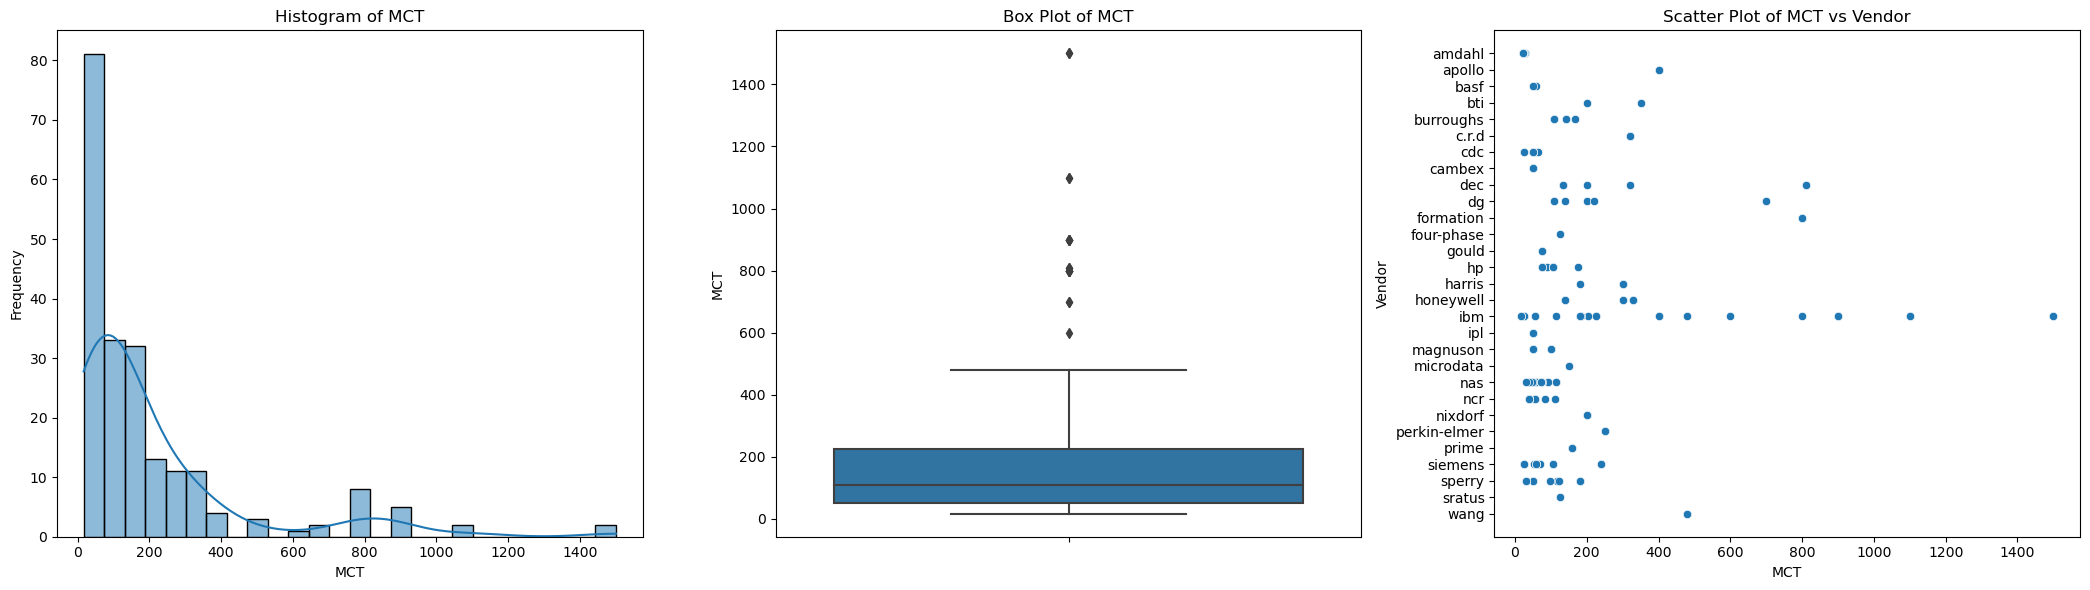

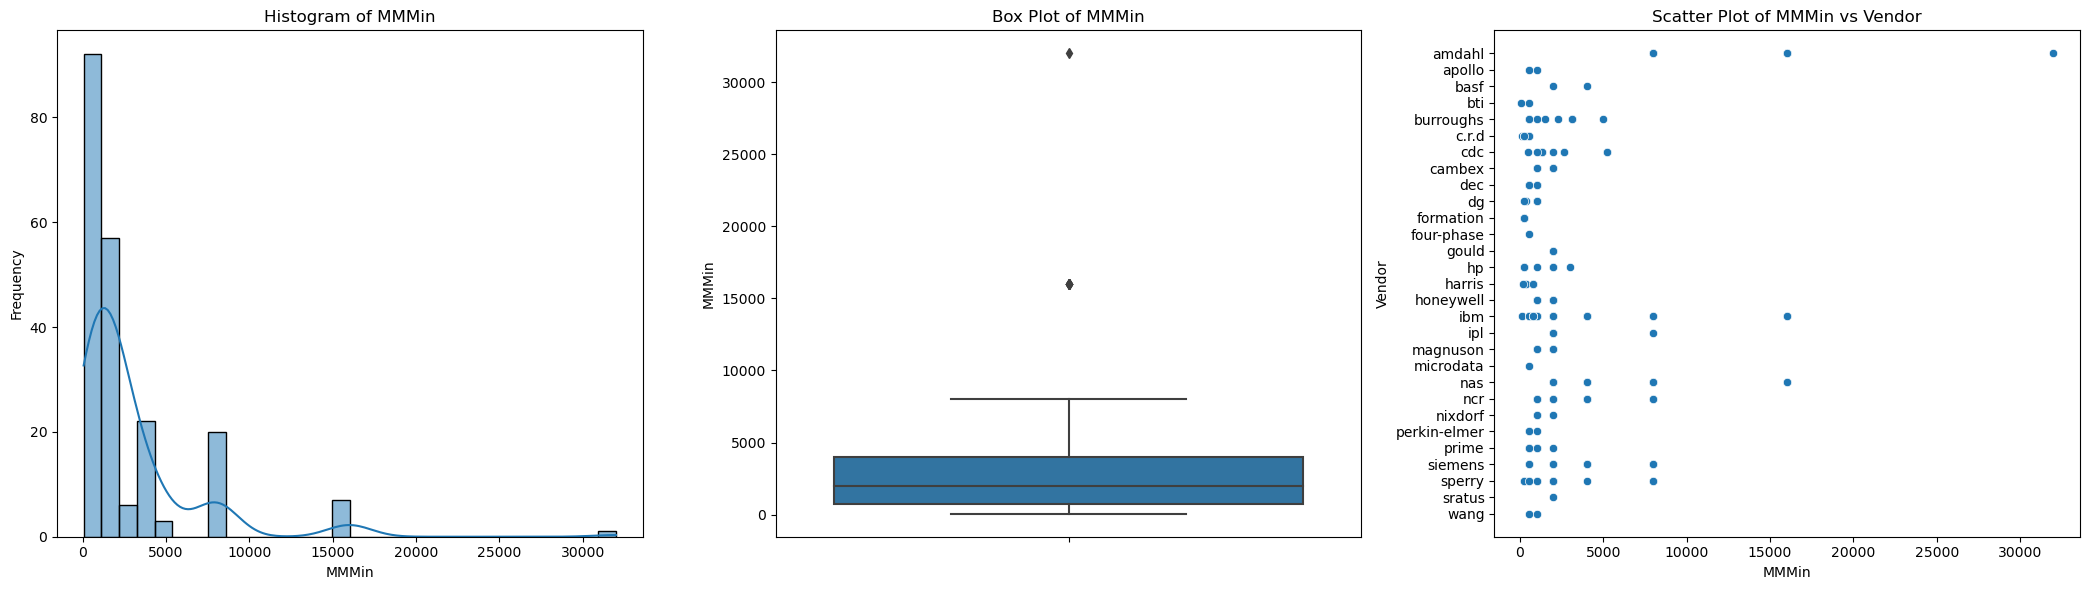

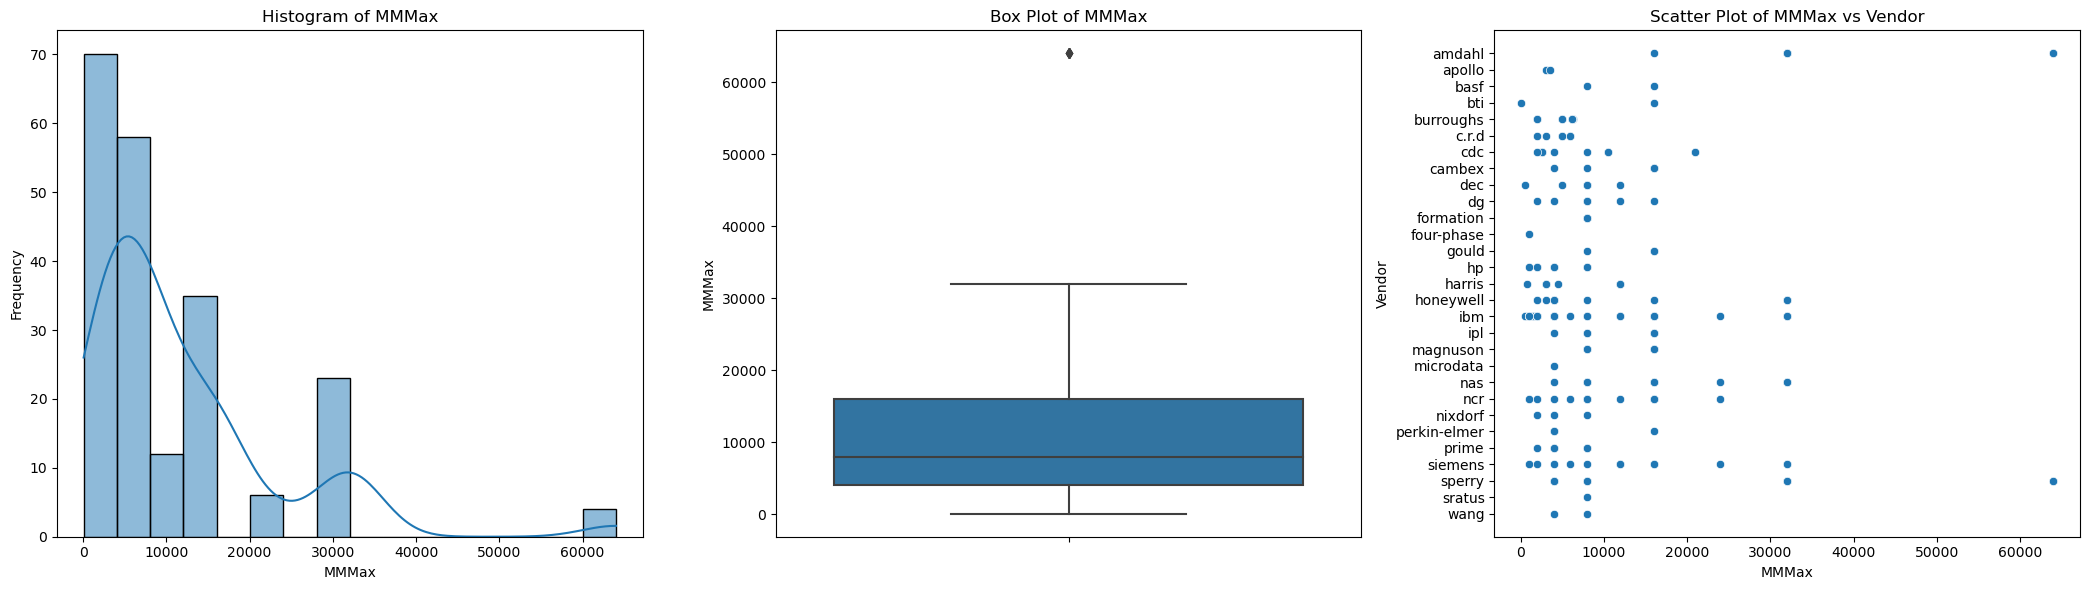

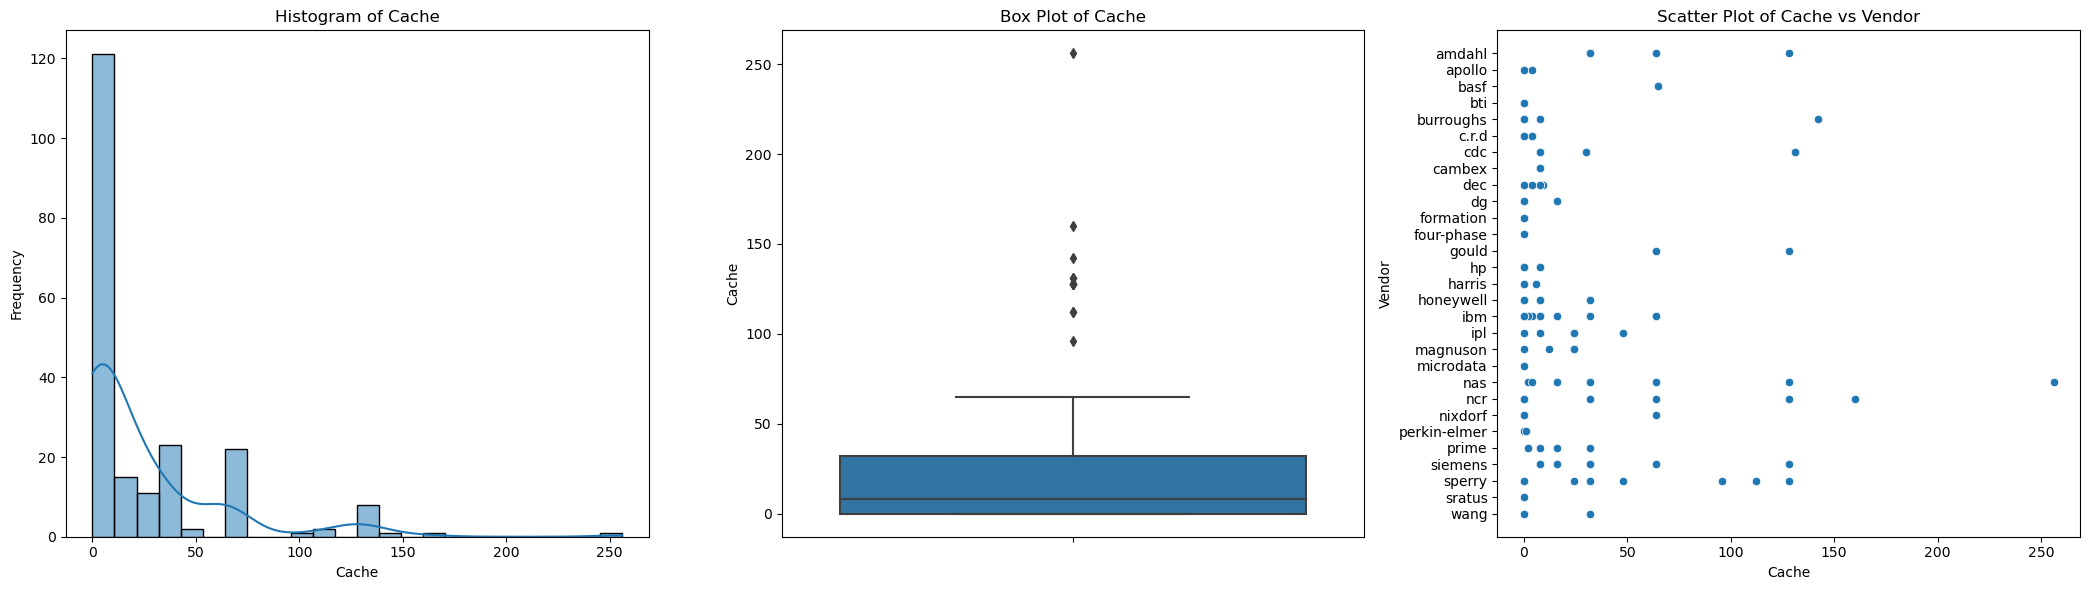

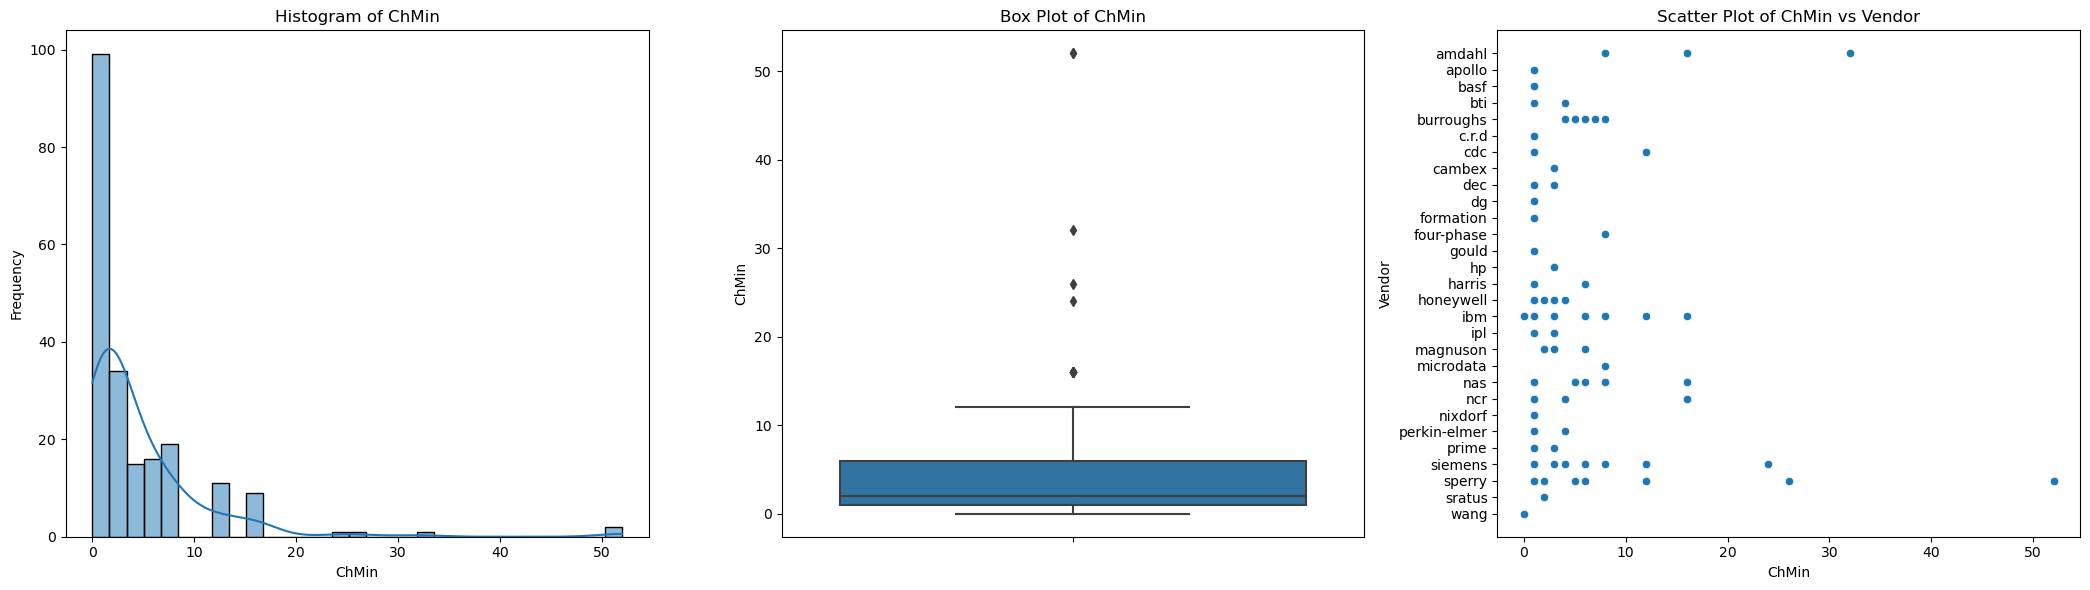

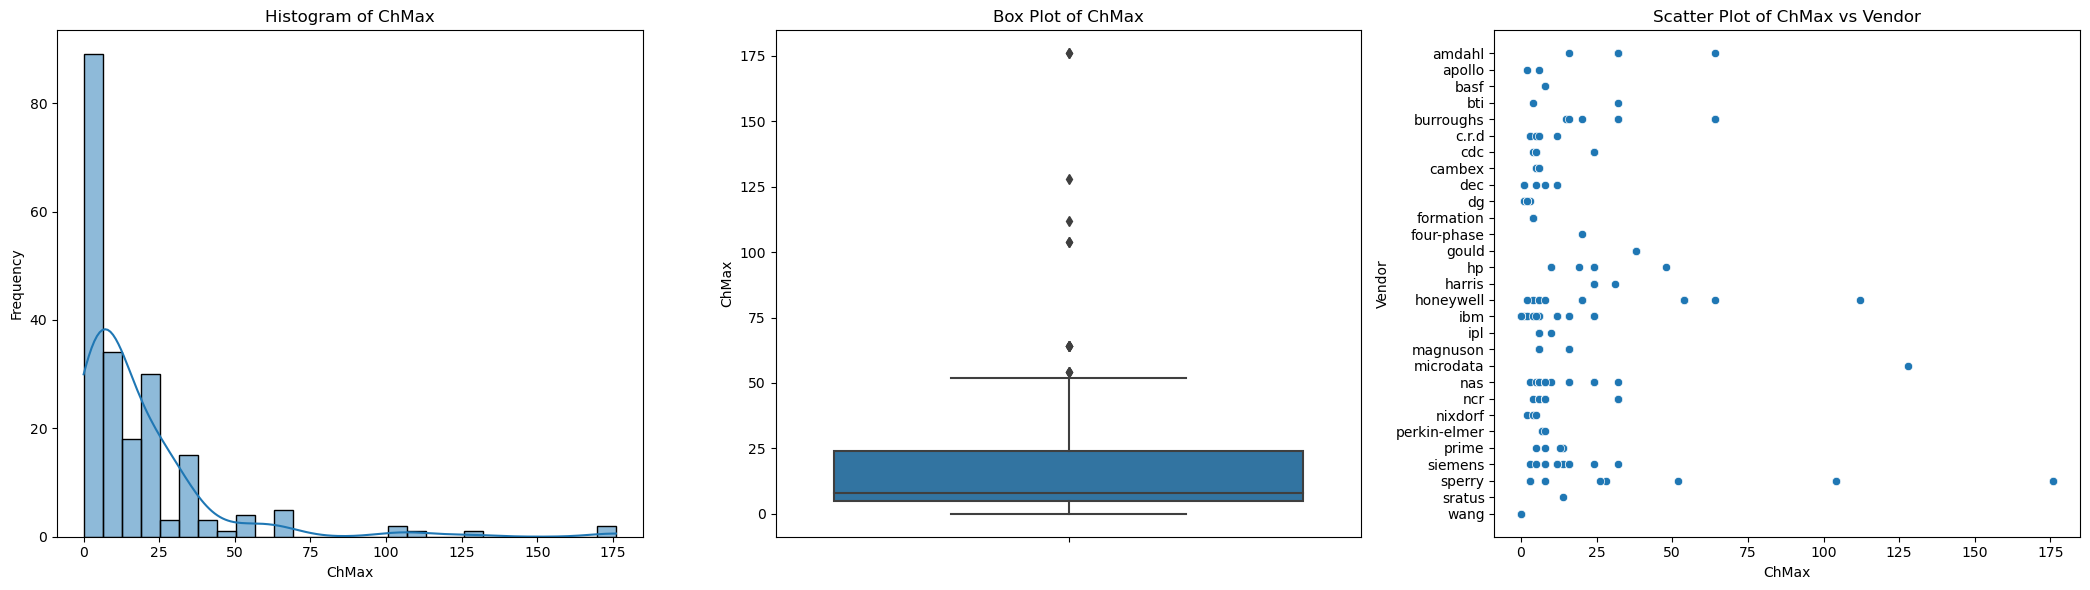

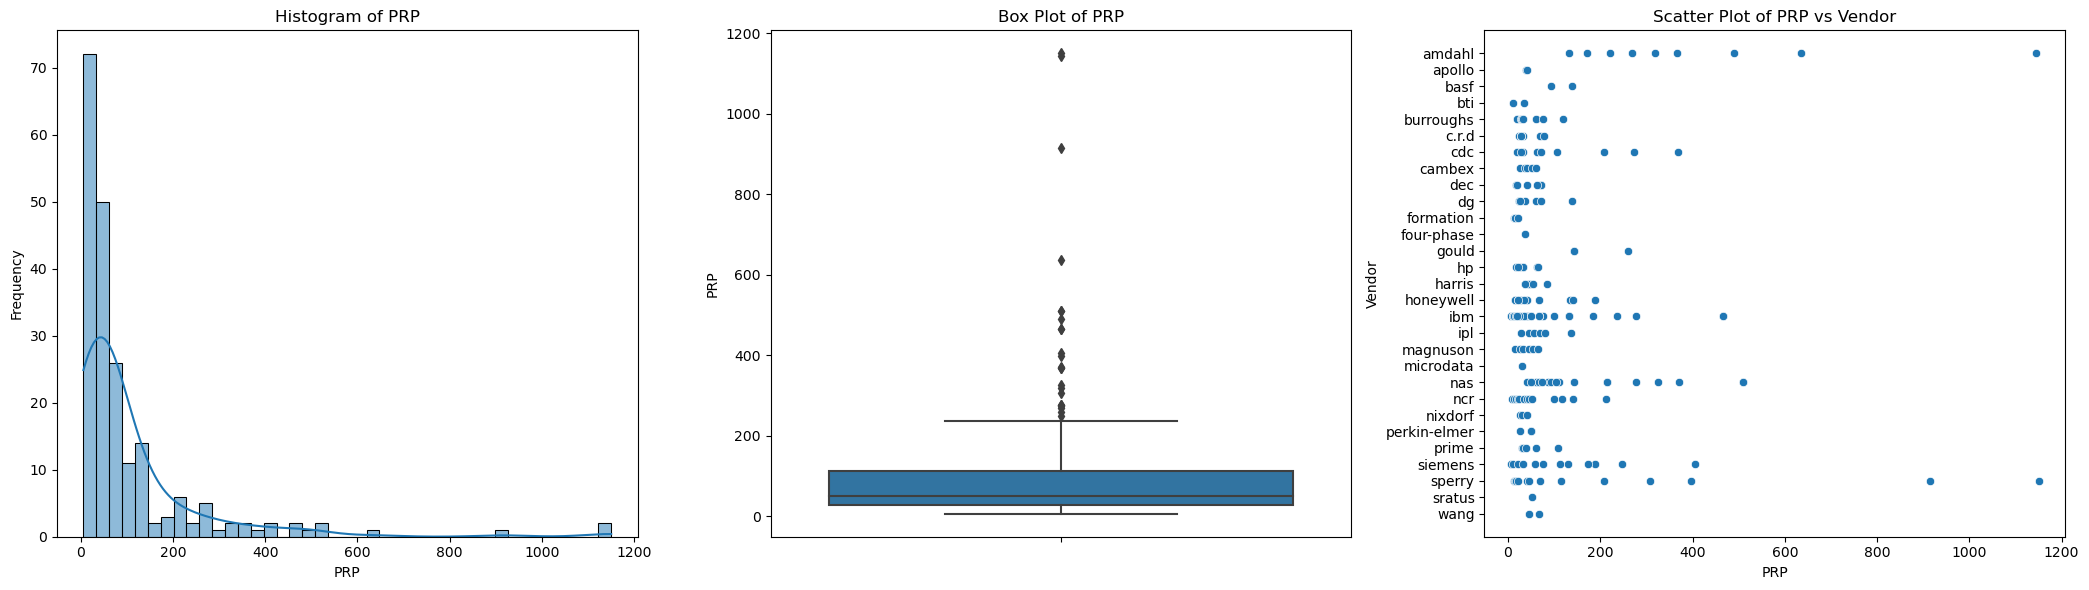

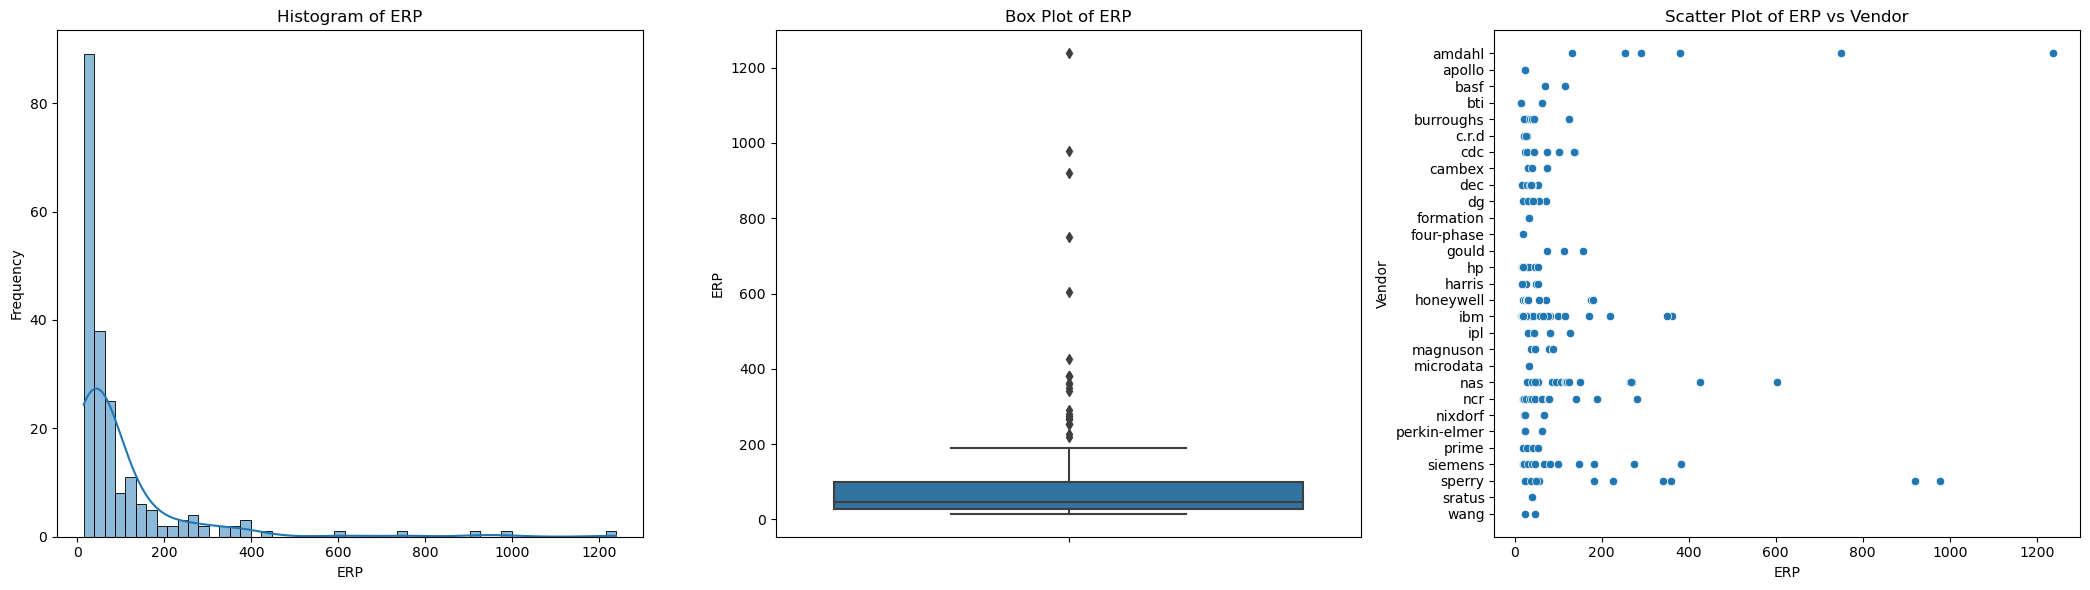

In [10]:

for column in df.select_dtypes(include='int64').columns:
    plt.figure(figsize=(21, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    # Scatter Plot
    plt.subplot(1, 3, 3)
    # Scatter plot comparing each numerical column against the first encoded vendor column (as an example)
    # Adjust the y-axis accordingly if there are multiple encoded vendor columns
    sns.scatterplot(x=df[column], y=df['Vendor'])  # Replace 'Vendor_B' with the appropriate vendor column if needed
    plt.title(f'Scatter Plot of {column} vs Vendor')
    plt.xlabel(column)
    plt.ylabel('Vendor')

    plt.tight_layout()
    plt.show()

#### A heatmap was used to visualize the correlation of the columns with each other. In the visual, it can be seen that the first column has a weak negative correlation with all columns and the other 5 columns have a strong positive correlation with the target. However, no action will be taken in this regard yet.

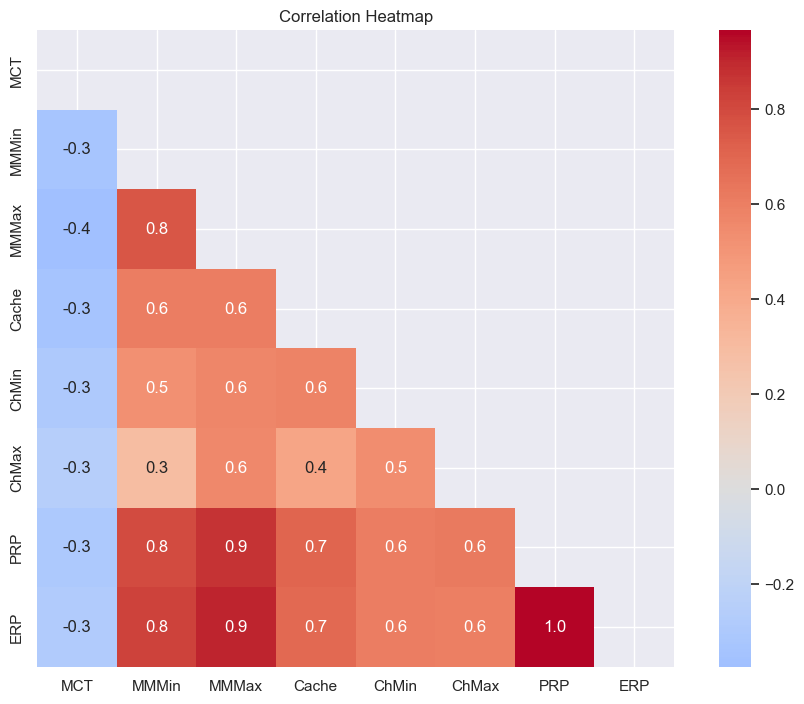

In [11]:
numerical_df = df.iloc[2:].select_dtypes(include=[np.number])
# Setting the size of the heatmap
sns.set(rc={'figure.figsize': (11.7, 8.27)})
# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))
# Creating the heatmap
sns.heatmap(data=numerical_df.corr(), annot=True, fmt=".1f", center=0, square=True, mask=mask, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing
convert categorical variables (Vendor and Model) into dummy/indicator variables.

In [12]:
df = pd.get_dummies(df, columns=['Vendor', 'Model'], drop_first=True)

In [13]:
df[df['MMMax']==64000].iloc[:, :8]

MCT  MMMin  MMMax  Cache  ChMin  ChMax   PRP   ERP
7     23  16000  64000     64     16     32   636   749
8     23  32000  64000    128     32     64  1144  1238
197   30   8000  64000     96     12    176   915   919
198   30   8000  64000    128     12    176  1150   978

In [14]:
df['MMMax'].mode()

0    8000
Name: MMMax, dtype: int64

In [15]:
df[(df['MMMin']==32000)|(df['MMMin']==16000)].iloc[:, :8]

MCT  MMMin  MMMax  Cache  ChMin  ChMax   PRP   ERP
5     23  16000  32000     64     16     32   367   381
6     23  16000  32000     64     16     32   489   381
7     23  16000  64000     64     16     32   636   749
8     23  32000  64000    128     32     64  1144  1238
94    26  16000  32000     64     16     24   465   361
95    26  16000  32000     64      8     24   465   350
152   38  16000  32000    128     16     32   510   426
155   30  16000  32000    256     16     24   510   603

In [16]:
df[df['PRP']>df['ERP']].iloc[:, :8]

MCT  MMMin  MMMax  Cache  ChMin  ChMax   PRP  ERP
0     29   8000  32000     32      8     32   269  253
4     26   8000  32000     64      8     32   318  290
6     23  16000  32000     64     16     32   489  381
9    400   1000   3000      0      1      2    38   23
10   400    512   3500      4      1      6    40   24
..   ...    ...    ...    ...    ...    ...   ...  ...
198   30   8000  64000    128     12    176  1150  978
203  124   1000   8000      0      1      8    42   37
205  125   2000   8000      0      2     14    52   41
206  480    512   8000     32      0      0    67   47
207  480   1000   4000      0      0      0    45   25

[102 rows x 8 columns]

## Model Development

In [17]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import metrics

Split the data

In [18]:
X = df.drop(['PRP','ERP'], axis=1)
y_published = df['PRP']
y = df['ERP']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

It is divided into train and test with a ratio of 20/80 and the target is initially taken as the Estimated Relative Performance column.

Let's run the models and see the number of columns and rows of the partition in test and train.

In [20]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None,predictions=True)

In [21]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:01<00:00, 25.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 6
[LightGBM] [Info] Start training from score 95.933735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

## Model Evaluation

Let's get acquainted with the results of the same data using different regression models. The following metrics are important for regression.

In [22]:
models_df=pd.DataFrame(models)

In [23]:
models_df = models_df.reset_index()
models_df.rename(columns={'index': 'Model'}, inplace=True)

In [24]:
models_df = models_df.round(4)

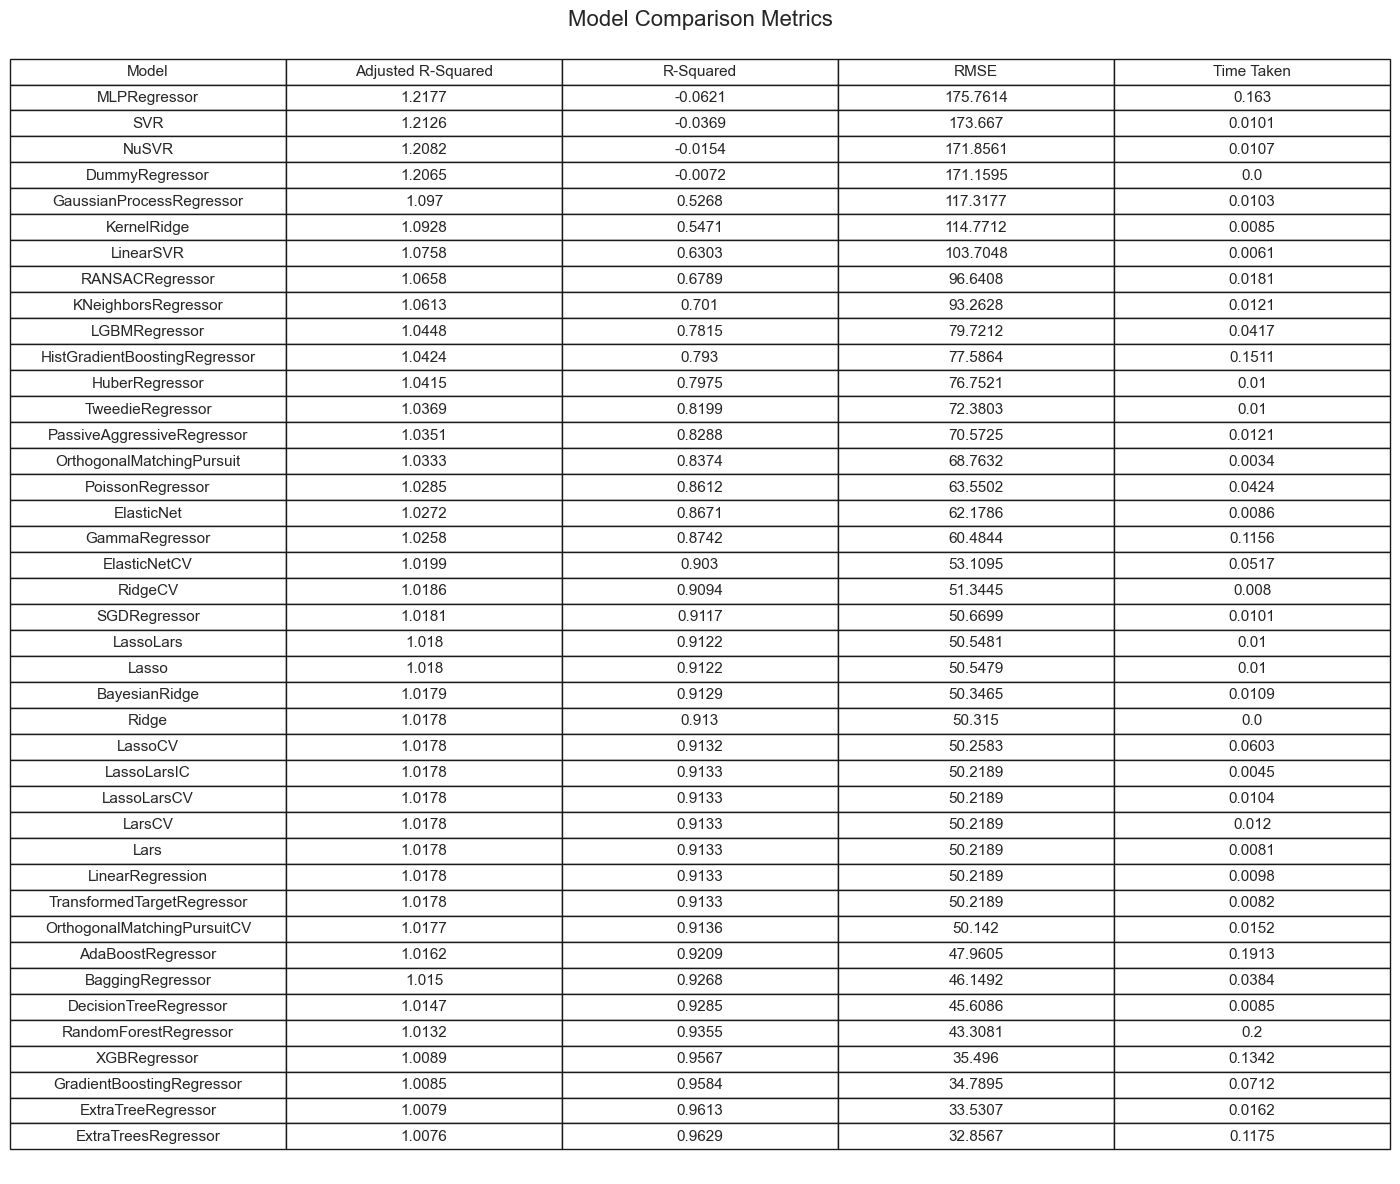

In [25]:
fig, ax = plt.subplots(figsize=(23, 19))

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=models_df.values, colLabels=models_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

table.scale(1, 2)

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

plt.title('Model Comparison Metrics', fontsize=16)
plt.show()

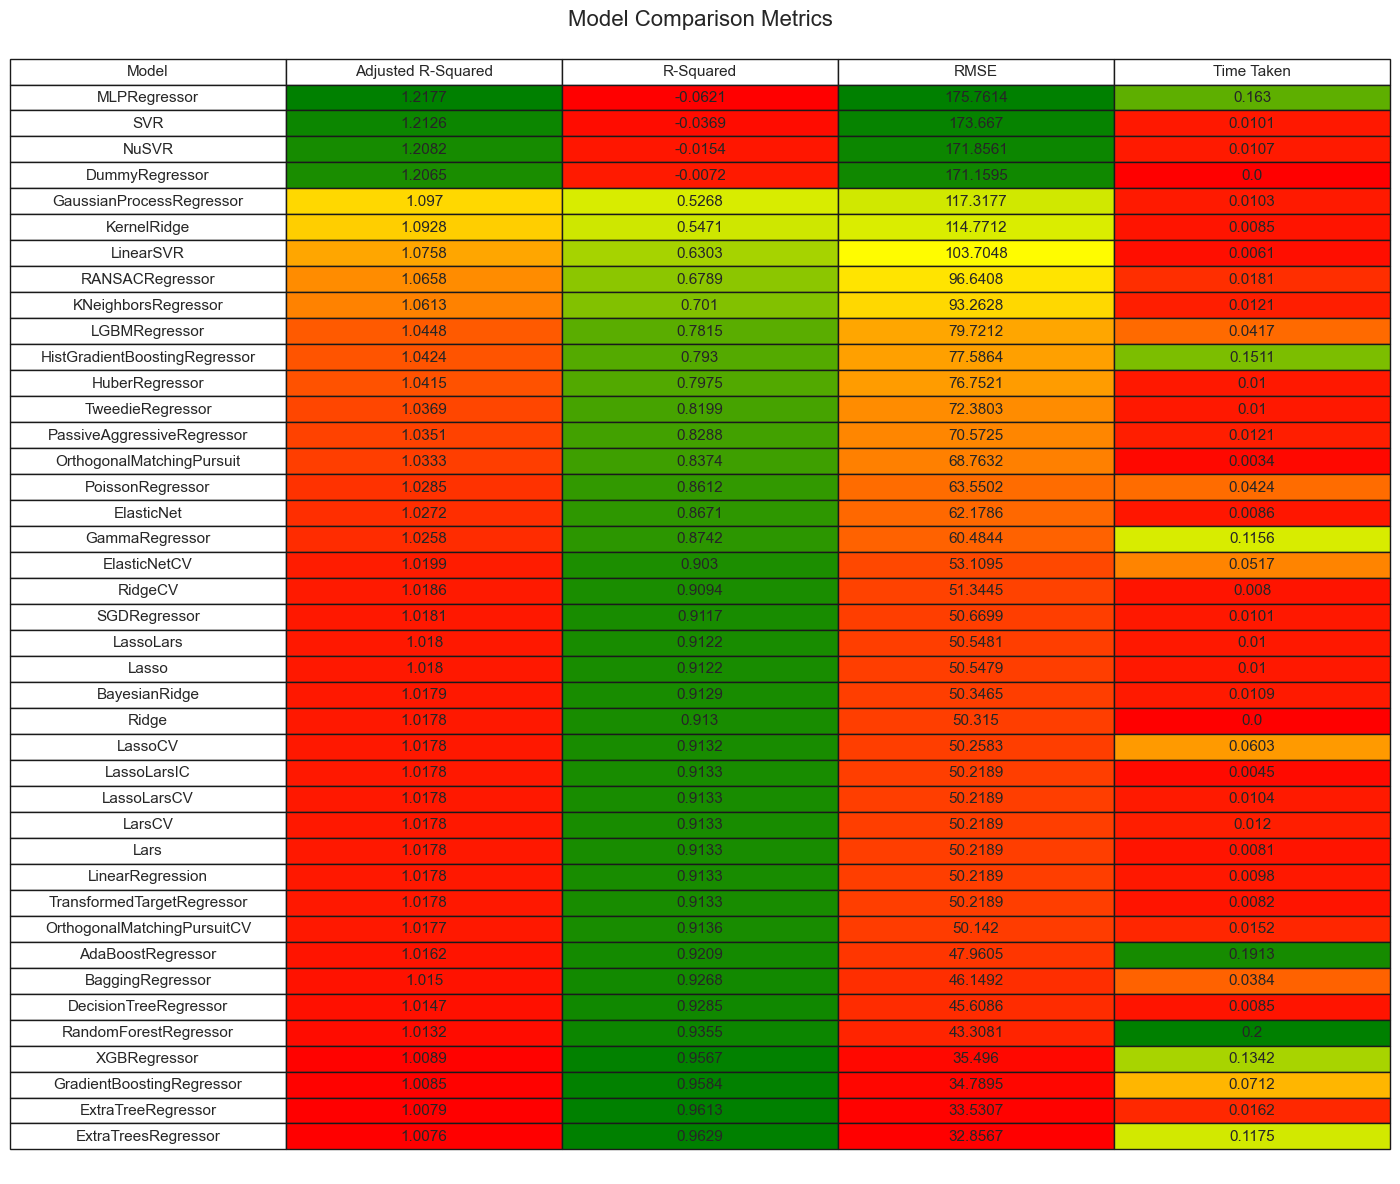

In [26]:
fig, ax = plt.subplots(figsize=(23, 19))

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=models_df.values, colLabels=models_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

table.scale(1, 2)

def colorize(val, min_val, max_val):
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
    norm = mcolors.Normalize(vmin=min_val, vmax=max_val)
    return cmap(norm(val))

for (i, j), val in np.ndenumerate(models_df.values):
    if j > 0:  # Skip the 'Model' column
        col = models_df.columns[j]
        min_val = models_df[col].min()
        max_val = models_df[col].max()
        table[(i+1, j)].set_facecolor(colorize(val, min_val, max_val))

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

plt.title('Model Comparison Metrics', fontsize=16)

plt.show()

In [27]:
top_models_r_squared = models_df.sort_values(by='R-Squared', ascending=False).head(3)

top_models_rmse = models_df.sort_values(by='RMSE', ascending=True).head(3)

top_models = pd.concat([top_models_r_squared, top_models_rmse]).drop_duplicates().head(3)

print("Top 3 Models based on R-Squared and RMSE:")
print(top_models)

Top 3 Models based on R-Squared and RMSE:
                        Model  Adjusted R-Squared  R-Squared  RMSE  Time Taken
40        ExtraTreesRegressor                1.01       0.96 32.86        0.12
39         ExtraTreeRegressor                1.01       0.96 33.53        0.02
38  GradientBoostingRegressor                1.01       0.96 34.79        0.07


Tabular form: existing, predicted and differences obtained by subtracting the first from the other under the name "Resuduals"

In [28]:
predictions_df=pd.DataFrame(predictions)

In [29]:
predictions_df.head(3)

AdaBoostRegressor  BaggingRegressor  BayesianRidge  DecisionTreeRegressor  \
0              56.59             41.90          57.34                  41.00   
1              54.35             21.20         -13.35                  22.00   
2              54.35             22.60          12.69                  22.00   

   DummyRegressor  ElasticNet  ElasticNetCV  ExtraTreeRegressor  \
0           95.93       61.84         58.57               41.00   
1           95.93       15.81         -2.64               22.00   
2           95.93       33.80         20.50               22.00   

   ExtraTreesRegressor  GammaRegressor  ...  RANSACRegressor  \
0                45.44           50.96  ...            49.86   
1                21.70           41.00  ...            18.64   
2                22.84           41.78  ...            25.72   

   RandomForestRegressor  Ridge  RidgeCV  SGDRegressor   SVR  \
0                  44.25  57.32    57.78         57.22 47.29   
1                  21.57 -13.54    -8.53        -13.63 35.07   
2                  22.52  12.55    16.27         12.99 36.33   

   TransformedTargetRegressor  TweedieRegressor  XGBRegressor  LGBMRegressor  
0                       57.27             64.97         47.12          49.45  
1                      -14.16             29.33         24.09          36.18  
2                       12.09             44.05         24.14          11.09  

[3 rows x 41 columns]

In [30]:
print("Length of y_test:", len(y_test))
print("Lengths of prediction columns:")
for col in predictions_df.columns:
    print(f"Length of {col}:", len(predictions_df[col]))

Length of y_test: 42
Lengths of prediction columns:
Length of AdaBoostRegressor: 42
Length of BaggingRegressor: 42
Length of BayesianRidge: 42
Length of DecisionTreeRegressor: 42
Length of DummyRegressor: 42
Length of ElasticNet: 42
Length of ElasticNetCV: 42
Length of ExtraTreeRegressor: 42
Length of ExtraTreesRegressor: 42
Length of GammaRegressor: 42
Length of GaussianProcessRegressor: 42
Length of GradientBoostingRegressor: 42
Length of HistGradientBoostingRegressor: 42
Length of HuberRegressor: 42
Length of KNeighborsRegressor: 42
Length of KernelRidge: 42
Length of Lars: 42
Length of LarsCV: 42
Length of Lasso: 42
Length of LassoCV: 42
Length of LassoLars: 42
Length of LassoLarsCV: 42
Length of LassoLarsIC: 42
Length of LinearRegression: 42
Length of LinearSVR: 42
Length of MLPRegressor: 42
Length of NuSVR: 42
Length of OrthogonalMatchingPursuit: 42
Length of OrthogonalMatchingPursuitCV: 42
Length of PassiveAggressiveRegressor: 42
Length of PoissonRegressor: 42
Length of RANSACRe

### Creating the plots separately to avoid overlap
Plot 1: Predicted vs Residuals                                                    
Plot 2: Actual vs Predicted                                      


In [31]:
predictions_df.head(3)

AdaBoostRegressor  BaggingRegressor  BayesianRidge  DecisionTreeRegressor  \
0              56.59             41.90          57.34                  41.00   
1              54.35             21.20         -13.35                  22.00   
2              54.35             22.60          12.69                  22.00   

   DummyRegressor  ElasticNet  ElasticNetCV  ExtraTreeRegressor  \
0           95.93       61.84         58.57               41.00   
1           95.93       15.81         -2.64               22.00   
2           95.93       33.80         20.50               22.00   

   ExtraTreesRegressor  GammaRegressor  ...  RANSACRegressor  \
0                45.44           50.96  ...            49.86   
1                21.70           41.00  ...            18.64   
2                22.84           41.78  ...            25.72   

   RandomForestRegressor  Ridge  RidgeCV  SGDRegressor   SVR  \
0                  44.25  57.32    57.78         57.22 47.29   
1                  21.57 -13.54    -8.53        -13.63 35.07   
2                  22.52  12.55    16.27         12.99 36.33   

   TransformedTargetRegressor  TweedieRegressor  XGBRegressor  LGBMRegressor  
0                       57.27             64.97         47.12          49.45  
1                      -14.16             29.33         24.09          36.18  
2                       12.09             44.05         24.14          11.09  

[3 rows x 41 columns]

In [32]:
y_test_df=pd.DataFrame(data=y_test)

In [33]:
y_test_df.reset_index(drop=True,inplace=True)

### Calculate the residuals for each model

In [34]:
residuals_df = predictions_df.subtract(y_test_df['ERP'], axis=0)

### Create subplots for each model

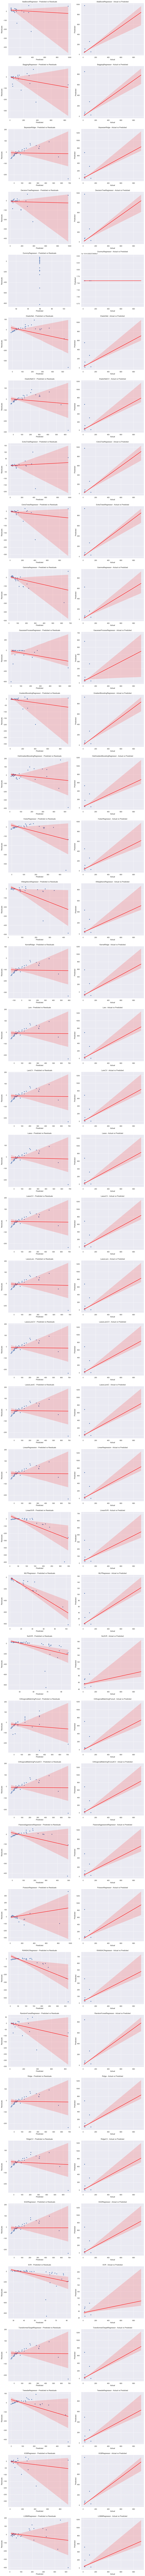

In [35]:
fig, axes = plt.subplots(len(predictions_df.columns), 2, figsize=(14, 6*len(predictions_df.columns)))

# Iterate over each model and plot
for i, model in enumerate(predictions_df.columns):
    # Plot Predicted vs Residuals
    sns.scatterplot(ax=axes[i, 0], x=predictions_df[model], y=residuals_df[model])
    sns.regplot(ax=axes[i, 0], x=predictions_df[model], y=residuals_df[model], scatter=False, color='red')
    axes[i, 0].set_title(f'{model} - Predicted vs Residuals')
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Residuals')

    # Plot Actual vs Predicted
    sns.scatterplot(ax=axes[i, 1], x=y_test, y=predictions_df[model])
    sns.regplot(ax=axes[i, 1], x=y_test_df['ERP'], y=predictions_df[model], scatter=False, color='red')
    axes[i, 1].set_title(f'{model} - Actual vs Predicted')
    axes[i, 1].set_xlabel('Actual')
    axes[i, 1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

### It can be seen from the distribution of errors that the outlier was uncleaned data

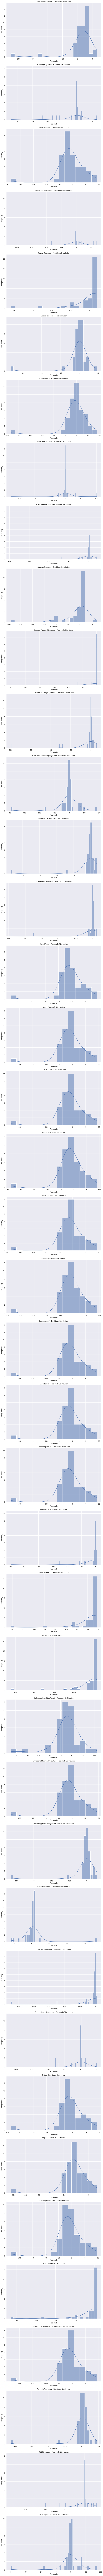

In [36]:
residuals_df = predictions_df.subtract(y_test_df['ERP'], axis=0)

# Create subplots for each model
fig, axes = plt.subplots(len(predictions_df.columns), 1, figsize=(10, 6*len(predictions_df.columns)))

# Iterate over each model and plot
for i, model in enumerate(predictions_df.columns):
    # Plot histogram of residuals
    sns.histplot(ax=axes[i], data=residuals_df, x=model, kde=True)
    axes[i].set_title(f'{model} - Residuals Distribution')
    axes[i].set_xlabel('Residuals')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Conclusion
Some models provide an initial approach to predicting CPU performance. Further improvements can be made by exploring other models and tuning hyperparameters. Future work can also include feature engineering and using more advanced machine learning techniques.